# Modélisation des probas

In [32]:
! pip install pandas

In [33]:
import os
import pandas as pd
os.getcwd()

path = "c:\\Users\\esthelle.kuissu\\OneDrive - Exiom Partners\\Documents\\Code_rapport_stage\\Bases sinistres"

datap = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")

C:\Users\esthelle.kuissu\AppData\Local\Temp\ipykernel_28564\4172452751.py:7: DtypeWarning: Columns (24,83) have mixed types. Specify dtype option on import or set low_memory=False.
  datap = pd.read_csv(path + "\\bdd_sinistres_MODELPROBA.csv", sep=";", encoding="utf-8")


In [34]:
import pandas as pd
import numpy as np

# --------------------------------------------------------------------------
# 0. Noms des colonnes montants
# --------------------------------------------------------------------------
mo_col    = "MT_MO_REPARABLE"
ip_col    = "MT_IP_REPARABLE"
piece_col = "MT_PIECES_REPARABLE"

# --------------------------------------------------------------------------
# 1. Variable texte brute : combinaison exacte des postes > 0
# --------------------------------------------------------------------------
def structure_postes(row):
    postes = []
    if row[mo_col]    > 0: postes.append("MO")
    if row[ip_col]    > 0: postes.append("IP")
    if row[piece_col] > 0: postes.append("PIECES")
    return "+".join(postes) if postes else "AUCUN"

datap["structure_sinistre"] = datap.apply(structure_postes, axis=1)

# --------------------------------------------------------------------------
# 2. Fusion souhaitée → nouvelle variable `structure_grp`
#    • IP  regroupe  {IP, MO+IP}
#    • PIECES regroupe {PIECES, MO+PIECES}
# --------------------------------------------------------------------------
map_fusion = {
    "MO"              : "MO+1AUTRE",
    "IP"              : "MO+1AUTRE",
    "MO+IP"           : "MO+1AUTRE",          # fusion ici
    "PIECES"          : "MO+1AUTRE",
    "MO+PIECES"       : "MO+1AUTRE",      # fusion ici
    "IP+PIECES"       : "MO+1AUTRE",
    "MO+IP+PIECES"    : "MO+IP+PIECES",
    "AUCUN"           : "AUCUN"
}

datap["structure_grp"] = datap["structure_sinistre"].map(map_fusion)

# --------------------------------------------------------------------------
# 3. Identifiant numérique  (tu peux changer les numéros si besoin)
# --------------------------------------------------------------------------
map_id = {
    "MO+1AUTRE"              : 1,
    "MO+IP+PIECES"          : 2,
}

datap["structure_id"] = datap["structure_grp"].map(map_id)

# --------------------------------------------------------------------------
# 4. Table de fréquence : pour contrôle
# --------------------------------------------------------------------------
freq = (
    datap.groupby(["structure_id", "structure_grp"])
         .size()
         .reset_index(name="n_sinistres")
         .sort_values("structure_id")
)

print(freq.to_string(index=False))


 structure_id structure_grp  n_sinistres
            1     MO+1AUTRE        81748
            2  MO+IP+PIECES       920097


In [35]:
print(list(datap.columns))

['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice', 'GARANTIE_HOST', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE', 'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_HONO', 'MT_PROVISIONS', 'MT_RECOURS_TOTAL', 'MT_ESTIMATION_RECOURS_RESTANTS', 'MT_AVANCE_RECOURS',

In [36]:
import pandas as pd

# Création des colonnes indicatrices (uint8 → 0/1)
dummies = pd.get_dummies(datap['exercice'], prefix='year').astype(int)

# (Optionnel) on retire l’année de base 2019 pour éviter la colinéarité
dummies = dummies.drop(columns=['year_2019'])

# Fusion avec ton DataFrame
datap = pd.concat([datap, dummies], axis=1)


In [37]:
import pandas as pd

# 0) ton DataFrame initial ----------------------------------------------------
# df = pd.read_csv("ton_fichier.csv")  # ou déjà présent en mémoire

# 1) liste explicite de TOUTES tes variables (copiée depuis ta question) -----
all_vars = [
    'cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp',
    'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais',
    'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest',
    'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG',
    'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment',
    'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid',
    'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite',
    'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup',
    'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt',
    'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice',
    'GARANTIE_HOST', 'MT_FRANCHISE', 'MT_CHARGE_BRUTE', 'MT_CHARGE_NETTE',
    'MT_REGLEMENT_SIN', 'MT_REGLEMENT_COM', 'MT_ABANDON_RECOURS', 'MT_FRAIS_HONO',
    'MT_PROVISIONS', 'MT_RECOURS_TOTAL', 'MT_ESTIMATION_RECOURS_RESTANTS',
    'MT_AVANCE_RECOURS', 'MT_AVANCE_RECOURS_RECOURUS', 'MT_PAIEMENTS',
    'MT_CHARGE_BRUTE_ECO', 'MT_CHARGE_NETTE_ECO', 'ZN_NO_RAPPORT_EXPTIS',
    'MT_VAL_REMPL_VEH_TTC', 'MT_TOTAL_REPARABLE', 'NB_REP', 'MT_MO_REPARABLE',
    'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'MT_IP_REPARABLE',
    'NBHH_IP_REPARABLE', 'MT_PIECES_REPARABLE', 'NB_PIECES_REEMPLOI',
    'MT_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP',
    'RE_AVEC_PIECE_REMPL_MP', 'MT_REMISE', 'MT_FORFAIT', 'MT_FORFAIT_ERD',
    'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'DPT_REP', '_RESEAU_',
    'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'veh_info_manquante', 'date_ord',
    'date_sortie_veh_imputee', 'annee_sortie_veh', 'date_nais_f',
    'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g',
    'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g',
    'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g',
    'marq_g', 'garag_g', 'Region', 'Zone', 'structure_sinistre', 'structure_id',
    'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024'
]

# 2) distinguer variables montants vs non montants ---------------------------
montants     = [v for v in all_vars if v.startswith('MT_')]
non_montants = [v for v in all_vars if v not in montants]

print(f"{len(montants)} variables de montant supprimées.")
print(f"{len(non_montants)} variables conservées.")

# 3) créer la base sans montants ---------------------------------------------
datap_sm = datap[non_montants].copy()

# 4) enregistrer si besoin ----------------------------------------------------
#datap_sm.to_csv("baseproba_sans_montants.csv", index=False, encoding="utf-8")


24 variables de montant supprimées.
116 variables conservées.


In [38]:
datap_sm.head()

,cle_sin,date_evt,date_evt_decla,clos,sans_suite,quart_resp,date_premsous,date_dernrempl,formule_ratt,cond_indet,...,garag_g,Region,Zone,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,04/01/2019,O,N,plus_50pc,29/06/1987,09/01/2015,PRO,N,...,Petit garage,Nouvelle-Aquitaine,Ouest,MO+IP+PIECES,2,0,0,0,0,0
1,191840048C A 001,01/01/2019,02/01/2019,N,N,plus_50pc,10/11/2018,2023-12-31 00:00:00,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,2,0,0,0,0,0
2,191840501C A 010,03/01/2019,04/01/2019,O,N,plus_50pc,13/07/2016,03/04/2018,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,2,0,0,0,0,0
3,191840759C A 001,06/01/2019,07/01/2019,O,N,plus_50pc,25/10/2015,2023-12-31 00:00:00,PRO,N,...,Garage moyen,Pays de la Loire,Ouest,MO+IP+PIECES,2,0,0,0,0,0
4,191840075AV A 003,01/01/2019,02/01/2019,O,N,plus_50pc,10/06/2015,11/03/2016,PRO,N,...,Garage moyen,NaN,I,MO+IP+PIECES,2,0,0,0,0,0


In [39]:
print(list(datap_sm.columns))

['cle_sin', 'date_evt', 'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous', 'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'age', 'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest', 'aac', 'date_sortie_veh', 'age_veh', 'usage2', 'franch', 'rachat_francBG', 'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros', 'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pkw', 'pfisc', 'vites', 'pvid', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur', 'systeme', 'exercice', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'NB_REP', 'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE', 'NB_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP', 'RE_AVEC_PIECE_REMPL_MP', 'LIB_CHOC', 'LIB_INTENS', 'GA

In [40]:
# ---------------------------------------------
# 1. Liste des variables à exclure
# ---------------------------------------------
exclure = [
    'date_evt_decla', 'clos', 'sans_suite', 'quart_resp', 'date_premsous',
    'date_dernrempl', 'formule_ratt', 'cond_indet', 'date_nais', 'Zone',
    'date_permis', 'anc_permis', 'sexe', 'profess', 'sitfam', 'orig_attest',
    'date_sortie_veh', 'usage2', 'franch', 'rachat_francBG',
    'garag', 'marq', 'modele2', 'generation', 'modele_desc', 'caros',
    'segment', 'energ', 'num_sra', 'cylin', 'pdyne', 'pfisc', 'vites',
    'pvid', 'bureau_ratt', 'fract_paiem_soc', 'formule_gar', 'petit_rouleur',
    'systeme', 'exercice', 'GARANTIE_HOST', 'ZN_NO_RAPPORT_EXPTIS', 'NB_REP',
    'NBHH_MO_REPARABLE', 'TAUX_HORAIRE_MO', 'NBHH_IP_REPARABLE',
    'NB_PIECES_REEMPLOI', 'RE_AVEC_PIECE_REEMPLOI', 'RE_AVEC_PIECE_REPAR_MP',
    'RE_AVEC_PIECE_REMPL_MP', 'veh_info_manquante', 'date_ord',
    'date_sortie_veh_imputee', 'DPT_REP'
]

# ---------------------------------------------
# 2. Variable d’origine : par ex. non_montants
#    (remplace par le nom réel de ta liste)
# ---------------------------------------------
# non_montants = [...]  # ta liste existante

# ---------------------------------------------
# 3. Création de la nouvelle liste filtrée
# ---------------------------------------------
vars_filtrees = [col for col in non_montants if col not in exclure]

print(f"{len(non_montants)} variables initiales → {len(vars_filtrees)} après exclusion.")

datap_s = datap_sm[vars_filtrees].copy()


116 variables initiales → 62 après exclusion.


In [41]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'age', 'aac', 'age_veh', 'pkw', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', '_RESEAU_', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [105]:
# 4) enregistrer si besoin ----------------------------------------------------
datap_s.to_csv(path + "basefinproba_sans_montants.csv", index=False, encoding="utf-8")



In [42]:
datap_s.head()

,cle_sin,date_evt,age,aac,age_veh,pkw,poidspuiss,sport,frein,cdval,...,marq_g,garag_g,Region,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,84.0,N,3.0,66.0,12.0,nn_spt,ABS,V06,...,Généralistes,Petit garage,Nouvelle-Aquitaine,MO+IP+PIECES,2,0,0,0,0,0
1,191840048C A 001,01/01/2019,18.0,O,6.0,51.5,15.0,nn_spt,ABS,V06,...,Autres,Garage moyen,Pays de la Loire,MO+IP+PIECES,2,0,0,0,0,0
2,191840501C A 010,03/01/2019,67.0,N,6.0,180.0,7.0,spt,ABS,V24,...,Premium,Garage moyen,Pays de la Loire,MO+IP+PIECES,2,0,0,0,0,0
3,191840759C A 001,06/01/2019,40.0,N,12.0,78.0,13.0,nn_spt,ABS,V09,...,Généralistes,Garage moyen,Pays de la Loire,MO+IP+PIECES,2,0,0,0,0,0
4,191840075AV A 003,01/01/2019,47.0,N,3.0,84.0,12.0,nn_spt,ABS,V11,...,Généralistes,Garage moyen,NaN,MO+IP+PIECES,2,0,0,0,0,0


In [13]:
print(len(list(datap_s.columns)))

62


## Petite sélection de variables

In [43]:
from sklearn.preprocessing import OneHotEncoder

# Remplace 'sparse' par 'sparse_output'
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [44]:
import pandas as pd
import numpy as np

# ------------------------------------------------------------------
# 0) Variables à exclure
# ------------------------------------------------------------------
to_exclude = {
    "cle_sin", "structure_id", "structure_sinistre",      # identifiants / cible
    "date_evt", "date_premsous"                           # dates non transformées
}

# ------------------------------------------------------------------
# 1) Détection automatique des variables numériques (quanti)
# ------------------------------------------------------------------
quant_vars = (
    datap_s
    .select_dtypes(include=[np.number])            # int, float, bool
    .columns.difference(to_exclude)
    .tolist()
)

# ------------------------------------------------------------------
# 2) Détection automatique des variables qualitatives (quali)
# ------------------------------------------------------------------
qual_vars = (
    datap_s
    .select_dtypes(include=["object", "category"])
    .columns.difference(to_exclude)
    .tolist()
)

print(f"{len(quant_vars)} variables numériques retenues")
print(f"{len(qual_vars)} variables qualitatives retenues")


19 variables numériques retenues
39 variables qualitatives retenues


In [86]:
# -----------------------------------------------------------------
# 1. Sous-ensemble : uniquement les variables quantitatives
# -----------------------------------------------------------------
#X = datap_s[quant_vars].copy()
#X = X.drop(columns=['structure_id'])


In [45]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'age', 'aac', 'age_veh', 'pkw', 'poidspuiss', 'sport', 'frein', 'cdval', 'trans', 'alim', 'suspe', 'boite', 'val', 'couple', 'airbag', 'crash', 'co2min', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'crm', 'boncond', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', '_RESEAU_', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [98]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Z = datap_s[quant_vars].copy()

vif = pd.DataFrame({
    "variable": Z.columns,
    "VIF"     : [variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])]
})
print(vif.sort_values("VIF", ascending=False))


              variable          VIF
5     annee_sortie_veh  1228.068416
6              boncond  1104.917826
11                 pkw    87.964159
12          poidspuiss    49.000396
9                  crm    39.228716
13                 val    36.179551
2                  age    18.552097
7               co2min    17.605847
8               couple    12.064447
4               airbag    10.377932
3              age_veh     4.139207
10               nab50     2.754166
1     NB_PIECE_REPAREE     2.327961
18           year_2024     2.289180
17           year_2023     2.135326
16           year_2022     2.030811
15           year_2021     1.987809
14           year_2020     1.855776
0   NB_PIECE_REMPLACEE     1.661903


In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

def calcul_vif(Z):
    """Calcule les VIFs pour chaque variable de X."""
    vif = pd.DataFrame()
    vif["variable"] = Z.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(Z.shape[1])]
    return vif

def supprimer_vif(Z, seuil=10):
    """Supprime récursivement les variables avec un VIF supérieur au seuil."""
    Z_clean = Z.copy()
    iteration = 1
    while True:
        vif = calcul_vif(Z_clean)
        max_vif = vif["VIF"].max()
        if max_vif > seuil:
            var_a_suppr = vif.sort_values("VIF", ascending=False).iloc[0]["variable"]
            print(f"[Itération {iteration}] Suppression de '{var_a_suppr}' avec VIF = {max_vif:.2f}")
            Z_clean = Z_clean.drop(columns=[var_a_suppr])
            iteration += 1
        else:
            break
    print(f"\n✅ Variables finales conservées ({Z_clean.shape[1]}):\n{list(Z_clean.columns)}")
    return Z_clean


VAR QUAL

In [115]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramer_v(x, y):
    """Cramér’s V pour deux variables catégorielles pandas (sans correction)."""
    confusion = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion, correction=False)[0]
    n    = confusion.sum().sum()
    k,r  = confusion.shape               # colonnes, lignes
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

def matrice_cramer(df, cat_cols):
    """Renvoie une matrice DataFrame de Cramér’s V pour toutes les paires."""
    V = pd.DataFrame(index=cat_cols, columns=cat_cols, dtype=float)
    for i, col1 in enumerate(cat_cols):
        for col2 in cat_cols[i:]:
            V.loc[col1, col2] = V.loc[col2, col1] = cramer_v(df[col1], df[col2])
    return V

# --- utilisation ------------------------------------------------------------
cat_cols = qual_vars                            # tes variables qualitatives
V = matrice_cramer(datap_s, cat_cols)

# lister les couples très corrélés (|V| > 0.7)
thr = 0.7
corr_pairs = (
    V.where(np.triu(np.ones(V.shape), k=1).astype(bool))
      .stack()
      .reset_index()
      .rename(columns={0: 'CramerV'})
      .query('CramerV > @thr')
      .sort_values('CramerV', ascending=False)
)
print(corr_pairs.head())


MemoryError: Unable to allocate 6.32 GiB for an array with shape (847683225,) and data type float64

In [46]:
vars_to_remove = [
    'cdval',
    'crash',
    'alim',
    '_RESEAU_',  # ou GARAGE_AGREE_O_N
    'frein'
]


In [47]:
datap_s = datap_s.drop(columns=vars_to_remove)

In [48]:

var_remove = [
    'boncond',
    'pkw',
    'poidspuiss',
    'crm',  # ou GARAGE_AGREE_O_N
    'val',
    'age',
    'co2min',
    'couple',
    'airbag'
]


In [49]:
datap_s = datap_s.drop(columns= var_remove)

In [50]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'aac', 'age_veh', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


# ARRET ICI

In [51]:
# ------------------------------------------------------------------
# 1. Liste des variables à exclure
# ------------------------------------------------------------------
exclude_cols = {'date_evt', 'cle_sin'}   # ajoute-en d'autres si besoin

# ------------------------------------------------------------------
# 2. Création de vars_final
# ------------------------------------------------------------------
vars_final = [col for col in datap_s.columns if col not in exclude_cols]

print(f"{len(datap_s.columns)} colonnes au départ → {len(vars_final)} conservées")
print(vars_final[:15], "...")   # aperçu des 15 premières


48 colonnes au départ → 46 conservées
['aac', 'age_veh', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'nab50', 'LIB_CHOC', 'LIB_INTENS'] ...


In [52]:
print(list(datap_s.columns))

['cle_sin', 'date_evt', 'aac', 'age_veh', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'nab50', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region', 'structure_sinistre', 'structure_id', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [24]:
! pip install --upgrade pip          && ^
! pip install "scikit-learn==1.6.1"  && ^
! pip install "imbalanced-learn==0.13.0"


  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Using cached sklearn_compat-0.1.3-py3-none-any.whl.metadata (18 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached scipy-1.16.0-cp311-cp311-win_amd64.whl (38.6 MB)
Using cached sklearn_compat-0.1.3-py3-none-any.whl (18 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ------ --------------------------------- 1/6 [scipy]
   ------ --------------------------------- 1/6 [scipy]
   ------ --------------

In [53]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix
# ------------------------------------------------------------
# a) Colonnes finales
#    - vars_final_num  : toutes les quantitatives retenues
#    - vars_final_cat  : toutes les qualitatives retenues
# ------------------------------------------------------------
#vars_final_num = [v for v in vars_final if (datap_s[v]).dtype.kind in "iufcb"]
# Variables qu’on veut exclure de toutes façons
vars_to_drop = {'boncond', 'pkw', 'poidspuiss', 'crm',  'val', 'age', 'co2min', 'couple', 'airbag', "structure_id", "structure_sinistre", 'cdval',
    'crash', 'alim', '_RESEAU_',  'frein', 'age_veh'}

vars_final_num = [
    v for v in vars_final
    if v in datap_s.columns and pd.api.types.is_numeric_dtype(datap_s[v])
]

vars_final_cat = [
    v for v in vars_final
    if v not in vars_final_num          # pas numériques
    and v not in vars_to_drop           # pas dans la liste noire
]

X = datap_s[vars_final_num + vars_final_cat]   
X = X.drop(columns=vars_to_drop, errors="ignore")# matrice explicative
y = datap_s["structure_id"]                        # variable cible (1 à 7)

In [54]:
print(list(X_train.columns))

['nab50', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024', 'aac', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region']


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

In [30]:
!pip install imbalanced-learn

In [40]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install --upgrade scikit-learn


  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl (10.7 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [42]:
! pip install scikit-learn==1.3.2



  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0


  You can safely remove it manually.


In [56]:
import pandas as pd
import numpy as np
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (log_loss, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay,
                             brier_score_loss)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.utils.class_weight import compute_class_weight

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt


In [57]:
var_quanti = X.select_dtypes(include=['int64', 'float64']).columns
print("Variables quantitatives :", list(var_quanti))


Variables quantitatives : ['nab50', 'NB_PIECE_REMPLACEE', 'NB_PIECE_REPAREE', 'annee_sortie_veh', 'year_2020', 'year_2021', 'year_2022', 'year_2023', 'year_2024']


In [58]:
var_quali = X.select_dtypes(include=['object', 'category']).columns
print("Variables qualitatives :", list(var_quali))


Variables qualitatives : ['aac', 'sport', 'trans', 'suspe', 'boite', 'elt_secu', 'vu', 'pickup', 'luxe', 'prestige', 'soumis_crm', 'LIB_CHOC', 'LIB_INTENS', 'GARAGE_AGREE_O_N', 'date_nais_f', 'date_permis_f', 'formule_ratt_g', 'sitfam_g', 'usage2_g', 'orig_attest_g', 'caros_g', 'segment_g', 'energ_g', 'frein_g', 'alim_g', 'suspe_g', 'crash_g', 'fract_paiem_soc_g', 'cdval_g', 'modele2_g', 'profess_g', 'marq_g', 'garag_g', 'Region']


In [47]:
list(X_train.columns)

['age_veh',
 'nab50',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'annee_sortie_veh',
 'structure_id',
 'year_2020',
 'year_2021',
 'year_2022',
 'year_2023',
 'year_2024',
 'aac',
 'sport',
 'frein',
 'cdval',
 'trans',
 'alim',
 'suspe',
 'boite',
 'crash',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 '_RESEAU_',
 'date_nais_f',
 'date_permis_f',
 'formule_ratt_g',
 'sitfam_g',
 'usage2_g',
 'orig_attest_g',
 'caros_g',
 'segment_g',
 'energ_g',
 'frein_g',
 'alim_g',
 'suspe_g',
 'crash_g',
 'fract_paiem_soc_g',
 'cdval_g',
 'modele2_g',
 'profess_g',
 'marq_g',
 'garag_g',
 'Region']

In [49]:
! pip show scikit-learn
! pip show imbalanced-learn


Name: scikit-learn
Version: 1.7.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License

 Copyright (c) 2007-2024 The scikit-learn developers.
 All rights reserved.

 Redistribution and use in source and binary forms, with or without
 modification, are permitted provided that the following conditions are met:

 * Redistributions of source code must retain the above copyright notice, this
   list of conditions and the following disclaimer.

 * Redistributions in binary form must reproduce the above copyright notice,
   this list of conditions and the following disclaimer in the documentation
   and/or other materials provided with the distribution.

 * Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived from
   this software without specific prior written permission.

 THIS SOFTWARE IS PROVIDED BY THE COPYR

In [50]:
! pip install "scikit-learn<1.7" --upgrade



  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.0
    Uninstalling scikit-learn-1.7.0:
      Successfully uninstalled scikit-learn-1.7.0


In [36]:
major_class_size = y_train.value_counts().max()


In [37]:
major_class_size 

736077

In [62]:
from sklearn.metrics import brier_score_loss

In [63]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay



In [40]:
! pip install matplotlib

  Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.4-cp311-cp311-win_amd64.whl.metadata (108 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp311-cp311-win_amd64.whl (222 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.4-cp311-cp311-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------  6.8/7.0 MB 41.7 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 33.1 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3

In [66]:
datap_s['structure_id'].value_counts(normalize=True)


structure_id
3    0.918403
1    0.081201
2    0.000396
Name: proportion, dtype: float64

In [64]:
! pip install optuna-integration[sklearn]

In [62]:
! pip install optuna

  Using cached optuna-4.4.0-py3-none-any.whl.metadata (17 kB)
  Using cached alembic-1.16.2-py3-none-any.whl.metadata (7.3 kB)
  Using cached colorlog-6.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached sqlalchemy-2.0.41-cp311-cp311-win_amd64.whl.metadata (9.8 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Using cached mako-1.3.10-py3-none-any.whl.metadata (2.9 kB)
  Using cached greenlet-3.2.3-cp311-cp311-win_amd64.whl.metadata (4.2 kB)
  Using cached MarkupSafe-3.0.2-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.1 MB 2.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.8/2.1 MB 1.8 MB/s eta 0:00:01
   -------------------------

In [67]:
# ==============================================================
# 0. Imports
# ==============================================================
import optuna
from imblearn.over_sampling import SMOTE
from imblearn.pipeline      import Pipeline as ImbPipeline
from sklearn.linear_model   import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.compose        import ColumnTransformer
from sklearn.preprocessing  import StandardScaler, OneHotEncoder
from sklearn.metrics        import log_loss
import numpy as np

# ==============================================================
# 1. Prétraitement (One‑Hot sparse + StandardScaler)
# ==============================================================
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), var_quanti),
        ("cat", OneHotEncoder(drop="first",
                              handle_unknown="ignore",
                              sparse_output=True),
                var_quali)
    ],
    remainder="drop"
)

# ==============================================================
# 2. Constantes globales
# ==============================================================
minor_class = 1                                # classe rare à booster
counts      = y_train.value_counts()
n_major     = counts.max()                     # effectif classe dominante

# Limites raisonnables : 0.5 (minorité = 50 % de majorité) à 1.0
RATIO_MIN, RATIO_MAX = 0.50, 1.00

# ==============================================================
# 3. Fonction objective Optuna
# ==============================================================
def objective(trial):

    # --- hyper‑paramètres explorés ---------------------------------
    C      = trial.suggest_float("C", 1e-3, 10, log=True)
    ratio  = trial.suggest_float("ratio", RATIO_MIN, RATIO_MAX)

    smote = SMOTE(
        sampling_strategy={minor_class: int(ratio * n_major)},
        k_neighbors=5,
        random_state=42
    )

    logit = LogisticRegression(
        solver="saga",             # accepte CSR
        class_weight="balanced",
        C=C,
        max_iter=400,
        n_jobs=-1
    )

    pipe = ImbPipeline([
        ("prep",  preprocess),
        ("smote", smote),
        ("clf",   logit)
    ])

    # --- validation croisée ---------------------------------------
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    try:
        scores = cross_val_score(
            pipe, X_train, y_train,
            cv=cv,
            scoring="neg_log_loss",   # log‑loss (négatif) natif
            n_jobs=1
        )
        return scores.mean()          # Optuna maximise -> valeur négative OK

    except ValueError as e:
        # stocke l'erreur pour diagnostic et prune l’essai
        trial.set_user_attr("error_msg", str(e))
        raise optuna.exceptions.TrialPruned()

# ==============================================================
# 4. Lancement de l’optimisation
# ==============================================================
study = optuna.create_study(direction="maximize")   # maximise le score négatif
study.optimize(objective, n_trials=40, timeout=3600, show_progress_bar=True)

print("\n=== BEST TRIAL ===")
print("Mean neg‑logloss :", study.best_value)
print("Hyper‑params     :", study.best_params)

# ==============================================================
# 5. Re‑fit avec les meilleurs hyper‑paramètres
# ==============================================================
best_C     = study.best_params["C"]
best_ratio = study.best_params["ratio"]

smote_best = SMOTE(
    sampling_strategy={minor_class: int(best_ratio * n_major)},
    k_neighbors=5,
    random_state=42
)

logit_best = LogisticRegression(
    solver="saga",
    class_weight="balanced",
    C=best_C,
    max_iter=400,
    n_jobs=-1
)

best_pipe = ImbPipeline([
    ("prep",  preprocess),
    ("smote", smote_best),
    ("clf",   logit_best)
]).fit(X_train, y_train)

# ==============================================================
# 6. (Option) calibration
# ==============================================================
from sklearn.calibration import CalibratedClassifierCV

calibrated = CalibratedClassifierCV(
    estimator=best_pipe,
    method="isotonic",
    cv=5,
    n_jobs=-1
).fit(X_train, y_train)

print("\n=== METRIQUES TEST ===")
print("Log‑loss :", log_loss(y_test, calibrated.predict_proba(X_test)).round(4))


[I 2025-07-04 10:03:40,012] A new study created in memory with name: no-name-fe56fd84-8532-41c2-bacd-d8d0bb13dd18
  0%|          | 0/40 [00:00<?, ?it/s]c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. T

[I 2025-07-04 10:34:36,991] Trial 0 finished with value: -0.5935616376360991 and parameters: {'C': 0.018858705900554502, 'ratio': 0.7698901908369872}. Best is trial 0 with value: -0.5935616376360991.


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Ex

[I 2025-07-04 11:04:11,197] Trial 1 finished with value: -0.5908232822976976 and parameters: {'C': 0.02510096845293514, 'ratio': 0.597739520620714}. Best is trial 1 with value: -0.5908232822976976.

=== BEST TRIAL ===
Mean neg‑logloss : -0.5908232822976976
Hyper‑params     : {'C': 0.02510096845293514, 'ratio': 0.597739520620714}


MemoryError: Unable to allocate 1.00 GiB for an array with shape (2565, 52319) and data type float64


=== METRIQUES TEST ===
Log‑loss : 0.2773812020332735
Brier     : 0.04932720283948136

               precision    recall  f1-score   support

           1      0.000     0.000     0.000     16270
           2      0.000     0.000     0.000        79
           3      0.918     1.000     0.957    184020

    accuracy                          0.918    200369
   macro avg      0.306     0.333     0.319    200369
weighted avg      0.843     0.918     0.879    200369



c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Code_rapport_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bein

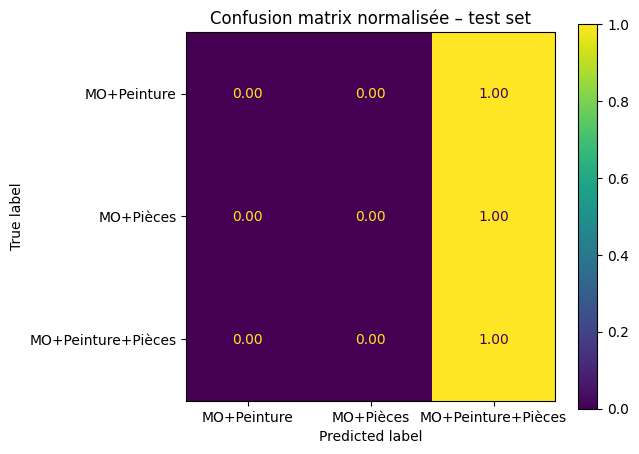

In [64]:
# ---------------------------------------------------------------------------
# 9. ÉVALUATION SUR LE TEST ---------------------------------------------------
# ---------------------------------------------------------------------------
import matplotlib.pyplot as plt

proba_test = cal_clf.predict_proba(X_test)
y_pred     = cal_clf.predict(X_test)

print("\n=== METRIQUES TEST ===")
print("Log‑loss :", log_loss(y_test, proba_test))
print("Brier     :", brier_score_loss(
    pd.get_dummies(y_test).values.ravel(), proba_test.ravel()))
print("\n", classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred, normalize="true")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["MO+Peinture",
                                              "MO+Pièces",
                                              "MO+Peinture+Pièces"])
disp.plot(values_format=".2f")
plt.title("Confusion matrix normalisée – test set")
plt.tight_layout()
plt.show()

In [43]:
y_test, y_pred

(620863    3
 43778     3
 152872    3
 622096    3
 230343    3
          ..
 889052    3
 143147    3
 20141     3
 671825    3
 133555    3
 Name: structure_id, Length: 200369, dtype: int64,
 array([3, 3, 3, ..., 3, 3, 3], shape=(200369,)))

In [44]:
df_comparaison = pd.DataFrame({
    'Valeur réelle': y_test,
    'Valeur prédite': y_pred  # ou 'Probabilité prédite': proba_test
})



In [45]:
df_comparaison.head(100)

,Valeur réelle,Valeur prédite
620863,3,3
43778,3,3
152872,3,3
622096,3,3
230343,3,3
...,...,...
606410,3,3
504960,1,1
15282,1,1
728987,3,3


In [ ]:
# ---------------------------------------------------------------------------
# 10. PRÉDICTION POUR UN NOUVEAU SINISTRE ------------------------------------
# ---------------------------------------------------------------------------
nouveau = pd.DataFrame({
    "age_vehicule": [4],
    "puissance_fiscale": [6],
    "km_parcourus": [47_000],
    "type_choc": ["arrière"],
    "zone_impact": ["pare_chocs"],
    "carrosserie": ["berline"],
    "energie": ["essence"]
})

proba_nouveau = cal_clf.predict_proba(nouveau)[0]
print("\nP(combos | sinistre) :", proba_nouveau)
print("  ↳ MO+Peinture        :", proba_nouveau[0])
print("  ↳ MO+Pièces          :", proba_nouveau[1])
print("  ↳ MO+Peinture+Pièces :", proba_nouveau[2])

# ---------------------------------------------------------------------------
# 11. SAUVEGARDE DU PIPELINE CALIBRÉ -----------------------------------------
# ---------------------------------------------------------------------------
joblib.dump(cal_clf, "artifacts/combo_classifier.pkl")
print("\n✅  Pipeline sauvegardé : artifacts/combo_classifier.pkl")

In [63]:
vars_final_num = [col for col in vars_final_num if col != 'structure_id']


In [27]:
import sklearn
print(sklearn.__version__)


1.7.0


# 30 JUIN

# STOP 

In [43]:
y_pred = clf.predict(X_test_ohe)


In [65]:
# En tableau côte à côte
comparaison = pd.DataFrame({
    "réel": y_test.values,
    "prévu": y_pred
})

print(comparaison.head(20))  # Affiche les 20 premières lignes

    réel  prévu
0      5      5
1      5      5
2      5      2
3      2      5
4      5      2
5      2      5
6      5      5
7      5      2
8      2      5
9      5      2
10     5      5
11     5      5
12     2      5
13     5      2
14     5      5
15     5      2
16     5      5
17     5      2
18     5      2
19     5      2


Accuracy : 0.6930463295220318
Précision : 0.8719043443871974
Rappel : 0.6930463295220318
F1-score : 0.7604240433091027

Rapport complet :
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.13      0.47      0.20     16270
           3       0.00      0.01      0.00        71
           4       0.00      0.00      0.00         5
           5       0.94      0.71      0.81    184020

    accuracy                           0.69    200369
   macro avg       0.21      0.24      0.20    200369
weighted avg       0.87      0.69      0.76    200369



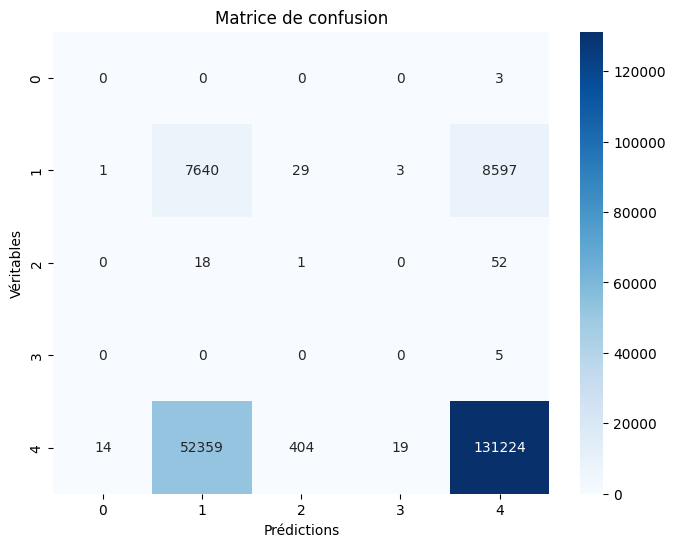

In [66]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# ⚡ Score global
print("Accuracy :", accuracy_score(y_test, y_pred))

# 🎯 Précision, Rappel, F1-score
print("Précision :", precision_score(y_test, y_pred, average='weighted'))
print("Rappel :", recall_score(y_test, y_pred, average='weighted'))
print("F1-score :", f1_score(y_test, y_pred, average='weighted'))

# 🧾 Rapport complet
print("\nRapport complet :\n", classification_report(y_test, y_pred))

# 🔥 Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables")
plt.show()


In [91]:
print("X_res shape :", X_res.shape)
print("X_test_ohe shape :", X_test_ohe.shape)
print("Are they equal ?", np.array_equal(X_res, X_test_ohe))

X_res shape : (3680385, 56075)
X_test_ohe shape : (200369, 56075)
Are they equal ? False


In [92]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train_ohe, y_train)
print("Top 10 variables les plus informatives :", np.argsort(mi)[-10:])


KeyboardInterrupt: 

In [40]:
# Probabilité prédite pour chaque classe (multinomial)
probas = model.predict_proba(X_test)

# Par exemple, pour les 5 premières observations
proba_df = pd.DataFrame(probas, columns=model.named_steps["clf"].classes_)
print(proba_df.head())


c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


          1         2         3         4         5
0  0.189413  0.210490  0.197884  0.188746  0.213468
1  0.209747  0.206348  0.207360  0.164910  0.211634
2  0.173038  0.240725  0.205586  0.131159  0.249492
3  0.207617  0.232664  0.210403  0.116494  0.232822
4  0.226656  0.223051  0.205944  0.129953  0.214396


METRIQUES

c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\esthelle.kuissu\OneDrive - Exiom Partners\Documents\Exiom_stage\Exiom_Stage\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [5, 14, 15] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


F1_macro             0.1429
Balanced_accuracy    0.2644
Precision_macro      0.2205
Recall_macro         0.2644
Log_loss             1.5655
Cohen_kappa          0.0314
dtype: float64


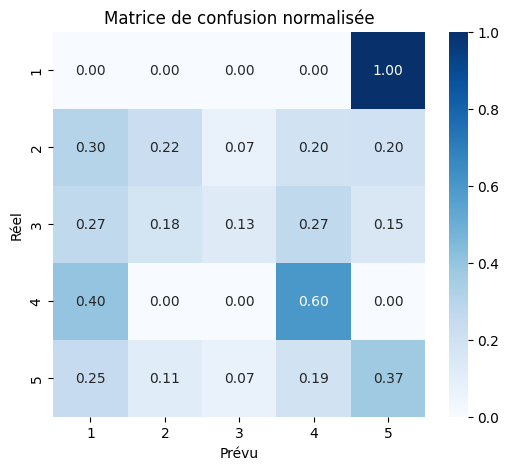

In [41]:
from sklearn.metrics import (
    f1_score, balanced_accuracy_score,
    precision_score, recall_score,
    log_loss, cohen_kappa_score,
    confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------------------------------------
# y_test  : vraies classes
# y_pred  : classes prédites           → clf.predict(X_test)
# y_proba : probas par classe (n×K)    → clf.predict_proba(X_test)
# -------------------------------------------------------------
y_pred  = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# ---- 1. Métriques numériques --------------------------------
metrics = {
    "F1_macro"          : f1_score(y_test, y_pred, average="macro"),
    "Balanced_accuracy" : balanced_accuracy_score(y_test, y_pred),
    "Precision_macro"   : precision_score(y_test, y_pred, average="macro", zero_division=0),
    "Recall_macro"      : recall_score(y_test, y_pred, average="macro", zero_division=0),
    "Log_loss"          : log_loss(y_test, y_proba),
    "Cohen_kappa"       : cohen_kappa_score(y_test, y_pred)
}

print(pd.Series(metrics).round(4))

# ---- 2. Matrice de confusion normalisée ---------------------
labels = sorted(y_test.unique())           # classes dans l’ordre
cm      = confusion_matrix(y_test, y_pred, labels=labels, normalize="true")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prévu"); plt.ylabel("Réel");
plt.title("Matrice de confusion normalisée");
plt.show()


En clair : le classifieur prédit presque tout le temps 5 (MO+IP+PIECES), sauf quelques 2 (≈ 20 %) — normal vu l’énorme déséquilibre.

Pourquoi ce comportement ?
Déséquilibre extrême : classe 5 ≈ 91 % des sinistres.

Pas (ou peu) de pondération : la log-vraisemblance est quasi entièrement pilotée par la classe majoritaire.

Classes 1, 3, 4 trop petites (≤ 0 .05 %) ↗ impossible pour un modèle multinomial standard d’apprendre quoi que ce soit.

In [30]:
datap_s.head()

,cle_sin,date_evt,age,aac,age_veh,pkw,poidspuiss,sport,trans,suspe,...,marq_g,garag_g,Region,structure_sinistre,structure_id,year_2020,year_2021,year_2022,year_2023,year_2024
0,191840439C A 018,02/01/2019,84.0,N,3.0,66.0,12.0,nn_spt,AV,4RI,...,Généralistes,Petit garage,Nouvelle-Aquitaine,MO+IP+PIECES,5,0,0,0,0,0
1,191840048C A 001,01/01/2019,18.0,O,6.0,51.5,15.0,nn_spt,AV,4RI,...,Autres,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
2,191840501C A 010,03/01/2019,67.0,N,6.0,180.0,7.0,spt,RM,4RI,...,Premium,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
3,191840759C A 001,06/01/2019,40.0,N,12.0,78.0,13.0,nn_spt,AV,4RI,...,Généralistes,Garage moyen,Pays de la Loire,MO+IP+PIECES,5,0,0,0,0,0
4,191840075AV A 003,01/01/2019,47.0,N,3.0,84.0,12.0,nn_spt,AV,4RI,...,Généralistes,Garage moyen,NaN,MO+IP+PIECES,5,0,0,0,0,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe_lasso = Pipeline([
    ('prep', preprocessor),                        # One-hot + numériques
    ('clf',  LogisticRegression(
                penalty='l1', solver='saga',
                multi_class='multinomial', max_iter=400))
])

param_C = {'clf__C': np.logspace(-3, 2, 12)}      # grille de pénalités
cv      = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_lasso = GridSearchCV(pipe_lasso,
                          param_grid=param_C,
                          cv=cv,
                          scoring='neg_log_loss',
                          n_jobs=-1)
grid_lasso.fit(datap_s[qual_vars + quant_vars + year_dummies], datap_s['structure_id'])

print("C optimal :", grid_lasso.best_params_['clf__C'])
print("Log-loss :", -grid_lasso.best_score_)

# variables conservées (≠ 0)
best_clf   = grid_lasso.best_estimator_.named_steps['clf']
coef_mask  = np.any(best_clf.coef_ != 0, axis=0)
selected   = np.array(grid_lasso.best_estimator_
                      .named_steps['prep']
                      .get_feature_names_out())[coef_mask]
print("Variables retenues par Lasso :", selected)


In [ ]:
import statsmodels.api as sm

def stepwise_selection(X, y, criterion='bic'):
    """Simplifié : ajoute/supprime jusqu’à ce que BIC (ou AIC) cesse d’améliorer."""
    remaining = list(X.columns)
    selected  = []
    current_score, best_new_score = np.inf, np.inf
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            model = sm.MNLogit(y, sm.add_constant(X[selected + [candidate]])).fit(disp=0)
            score = model.bic if criterion=='bic' else model.aic
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
        else:
            break
    return selected

X_step = pd.get_dummies(datap_s[qual_vars + quant_vars + year_dummies], drop_first=True)
y      = datap_s['structure_id']
vars_BIC = stepwise_selection(X_step, y, criterion='bic')
print("Variables retenues (BIC) :", vars_BIC)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

rf = RandomForestClassifier(n_estimators=500, random_state=42)
X_rf = pd.get_dummies(datap_s[qual_vars + quant_vars + year_dummies], drop_first=True)
rf.fit(X_rf, y)

perm = permutation_importance(rf, X_rf, y,
                              scoring='neg_log_loss', n_repeats=5, n_jobs=-1)
imp  = pd.Series(perm.importances_mean, index=X_rf.columns).sort_values(ascending=False)
print("Top 20 importances permutation :")
print(imp.head(20))


# COPULE

In [67]:
! pip install copulas


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from copulas.multivariate import GumbelCopula

# Supposons que tu as ces colonnes binaires dans datap : 'MO', 'IP', 'PIECES'
# Et X_bal, y_bal sont tes données d'entraînement (pandas DataFrame / Series)

# 1. Estimer les marges (modèles logistiques binaires)
def fit_margins(X, features):
    marg_probs = {}
    for feat in features:
        model = LogisticRegression(solver='lbfgs', max_iter=200)
        model.fit(X.drop(columns=[f for f in features if f != feat]), X[feat])
        marg_probs[feat] = model.predict_proba(X.drop(columns=[f for f in features if f != feat]))[:,1]
    return marg_probs

# MAIS ici, mieux vaut juste utiliser les colonnes directement, car ce sont des colonnes binaires !
# On peut directement prendre les proportions empiriques ou une régression simple sur X_bal

# Simplifions : on prend les marges empiriques sur X_bal

features = ['MO', 'IP', 'PIECES']

marg_probs = {}
for feat in features:
    marg_probs[feat] = X_bal[feat].mean()  # moyenne simple (empirique)

print("Marges empiriques : ", marg_probs)

# 2. Transformer les marges en U(0,1)
# Ici on doit récupérer les observations sous forme uniformes.
# Pour ça, on prend les colonnes MO, IP, PIECES (0/1)
U = X_bal[features].copy()
# Les marges en 0/1 sont triviales, on convertit en uniformes comme suit :
# Soit U_i = F_i(x_i) = prob d'observer <= x_i, pour une variable binaire,
# on peut approximer par la CDF empirique :
# 0 => prob(=0)
# 1 => prob(<=1) = 1
for feat in features:
    p0 = 1 - marg_probs[feat]  # prob d'être 0
    # U=0 => p0, U=1 => 1
    U[feat] = U[feat].apply(lambda x: p0 if x==0 else 1.0)

# 3. Estimer la copule Gumbel sur les données uniformes
copula = GumbelCopula()
copula.fit(U.values)

# 4. Calculer les probabilités jointes pour chaque combinaison possible
# Rappel map_id :
# 1 = MO
# 2 = MO+IP
# 3 = MO+PIECES
# 4 = IP+PIECES
# 5 = MO+IP+PIECES

def prob_structure_id(copula, marg_probs, comb):
    # comb : dict {feat: 0/1}
    # On calcule P(X_1=x1, X_2=x2, X_3=x3) via la copule et marges :
    # Copule donne C(u1, u2, u3) où u_i = F_i(x_i)
    # Pour binaire, on fait P(X=1) = 1 - F(0)
    # Ici on utilise la formule d'inclusion-exclusion via les copules

    # Pour chaque variable, calculer u_i = F_i(x_i)
    # Pour x_i=1, u_i = 1
    # Pour x_i=0, u_i = p0_i

    u = []
    for feat in features:
        p0 = 1 - marg_probs[feat]
        u_i = 1 if comb[feat]==1 else p0
        u.append(u_i)

    # Inclusion-exclusion classique pour binaire
    # P(X1=x1,X2=x2,X3=x3) = 
    #   C(u) - sum sur les marges inférieures selon x_i=0
    # Utiliser CDF de la copule aux bons points

    # On énumère toutes les sous-vecteurs v <= u selon x_i=0
    # En fait pour binaire on a 8 combinaisons (0/1)^3.
    # On calcule selon les variables 0 ou 1 :
    # P = sum_{S subseteq variables où x_i=0} (-1)^|S| C(u_S)
    # où u_S remplace les composantes de u par 0 si i in S

    # Simplifions : on utilise la formule donnée par Joe (copule multinomial binaire)
    # Le plus simple : calculer la probabilité par la différence de CDF de copule
    # Pour 3 variables, ça donne :

    u_vec = np.array(u)
    # Les bornes pour la probabilité sont toutes les combinaisons où on remplace les 1 par leurs u_i ou par 0

    # On crée la liste des indices où x_i=0
    zero_idx = [i for i, val in enumerate(comb.values()) if val==0]

    # On va faire la somme sur les sous-ensembles de zero_idx
    from itertools import combinations
    prob = 0
    for k in range(len(zero_idx)+1):
        for subset in combinations(zero_idx, k):
            # construire vecteur v pour la copule C(v)
            v = u_vec.copy()
            for idx in subset:
                v[idx] = 0
            sign = (-1)**k
            prob += sign * copula.cdf(v)
    return prob

# 5. Afficher les proba de chaque structure_id
combinations = {
    1: {'MO':1, 'IP':0, 'PIECES':0},
    2: {'MO':1, 'IP':1, 'PIECES':0},
    3: {'MO':1, 'IP':0, 'PIECES':1},
    4: {'MO':0, 'IP':1, 'PIECES':1},
    5: {'MO':1, 'IP':1, 'PIECES':1},
}

for cid, comb in combinations.items():
    p = prob_structure_id(copula, marg_probs, comb)
    print(f"Probabilité structure_id = {cid} ({comb}): {p:.5f}")

# Note : la somme des proba des 5 classes + P(aucun) doit être proche de 1.
# On peut aussi calculer la probabilité d'aucun activé (MO=IP=PIECES=0) si besoin.



In [71]:
vars_final

['age',
 'aac',
 'age_veh',
 'pkw',
 'poidspuiss',
 'sport',
 'trans',
 'suspe',
 'boite',
 'val',
 'couple',
 'airbag',
 'co2min',
 'elt_secu',
 'vu',
 'pickup',
 'luxe',
 'prestige',
 'soumis_crm',
 'crm',
 'boncond',
 'nab50',
 'LIB_CHOC',
 'LIB_INTENS',
 'GARAGE_AGREE_O_N',
 'NB_PIECE_REMPLACEE',
 'NB_PIECE_REPAREE',
 'annee_sortie_veh',
 'date_nais_f',
 'date_permis_f',
 'formule_ratt_g',
 'sitfam_g',
 'usage2_g',
 'orig_attest_g',
 'caros_g',
 'segment_g',
 'energ_g',
 'frein_g',
 'alim_g',
 'suspe_g',
 'crash_g',
 'fract_paiem_soc_g',
 'cdval_g',
 'modele2_g',
 'profess_g',
 'marq_g',
 'garag_g',
 'Region',
 'structure_sinistre',
 'structure_id',
 'year_2020',
 'year_2021',
 'year_2022',
 'year_2023',
 'year_2024']